# Observations

* Observing the data, at the equator (0 lattitude), shows the highest temperature values in a condensed cluster, this is because there is minimal change in distance from the run regardless of which hemisphere is in its summer or winter cycle (think planet tilt); cities closest to the equator generally stay hotter with consistent clear weather climate; while the latitudes in the positive and negative increase will have non consistent temperatures due to there localized climate.
* Being the hottest location at the equator (0 lattitude), the data shows it to have a consistent humidity percentage at the equator; whereas as you move away from the equator its more sporadic which is due to variety of weather patterns and differences between temperatures. 
* Clouds and Wind Speed have no real correlation as these can fluctuate more frequently during one day cycle then compared to temperature; coriolis plays a big role along with pressure differentials which can cause an increase or decrease in winds, while cloud travel will be determined by how fast or slow they'll move across the sky depending on the winds, so it is much harder to predict.

interesting website to observe these trends in real-time: https://earth.nullschool.net/

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [29]:
cities[0]

'eyl'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# url for accessing  api data from openweather
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [31]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3ff37a40edf22f7c0171626f6994478


In [32]:

#create lists for storing api data
cityName = []
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
dates = []

# set initial count quantities for organization
countRecord = 1
countSet = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------------------")

# loops for creating dataframe columns
for city in cities:
    
    
    try:
       
        response = requests.get(f"{url}&q={city}").json()
        cityName.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])               
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        
        
        print(f"Processing Record {countRecord} of set {countSet} | {city}")  
                
        countRecord += 1
       
         
        if countRecord == 51:
            countSet += 1
            countRecord = 1
   
    except KeyError:
        print(f"{city} not found. Skipping...")
        #print((f"{url}&q={city}"))
    #break
    continue
    
  

print(f"------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of set 1 | eyl
Processing Record 2 of set 1 | vaini
Processing Record 3 of set 1 | boyolangu
Processing Record 4 of set 1 | mar del plata
Processing Record 5 of set 1 | coahuayana
Processing Record 6 of set 1 | jalu
Processing Record 7 of set 1 | sitka
Processing Record 8 of set 1 | planeta rica
Processing Record 9 of set 1 | albany
saleaula not found. Skipping...
Processing Record 10 of set 1 | khatanga
Processing Record 11 of set 1 | nantucket
Processing Record 12 of set 1 | tazovskiy
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | hobyo
taolanaro not found. Skipping...
Processing Record 15 of set 1 | deputatskiy
Processing Record 16 of set 1 | busselton
Processing Record 17 of set 1 | ushuaia
Processing Record 18 of set 1 | butaritari
Processing Record 19 of set 1 | nago
Processing Record 20 of set 1 | tiksi
Processing Record 21 of set 1 | hirara
Processing Record 22 of se

Processing Record 36 of set 4 | belaya gora
Processing Record 37 of set 4 | constitucion
Processing Record 38 of set 4 | kavieng
Processing Record 39 of set 4 | moramanga
Processing Record 40 of set 4 | kuchera
Processing Record 41 of set 4 | sambava
Processing Record 42 of set 4 | ponta do sol
Processing Record 43 of set 4 | wattegama
Processing Record 44 of set 4 | ludvika
Processing Record 45 of set 4 | bredasdorp
Processing Record 46 of set 4 | mezen
Processing Record 47 of set 4 | henties bay
chagda not found. Skipping...
Processing Record 48 of set 4 | santa maria
Processing Record 49 of set 4 | laguna
Processing Record 50 of set 4 | barao de melgaco
Processing Record 1 of set 5 | katsuura
sorvag not found. Skipping...
Processing Record 2 of set 5 | vila franca do campo
Processing Record 3 of set 5 | cherskiy
Processing Record 4 of set 5 | valparaiso
Processing Record 5 of set 5 | torbay
Processing Record 6 of set 5 | saint-alexandre
Processing Record 7 of set 5 | ixtapa
Processi

labutta not found. Skipping...
Processing Record 19 of set 8 | kasumigaura
Processing Record 20 of set 8 | loa janan
Processing Record 21 of set 8 | ozernovskiy
Processing Record 22 of set 8 | port-gentil
Processing Record 23 of set 8 | lagoa
Processing Record 24 of set 8 | tame
Processing Record 25 of set 8 | rawlins
Processing Record 26 of set 8 | barcelona
Processing Record 27 of set 8 | iqaluit
Processing Record 28 of set 8 | ust-kulom
Processing Record 29 of set 8 | berezovyy
Processing Record 30 of set 8 | ribeira grande
Processing Record 31 of set 8 | tagusao
Processing Record 32 of set 8 | cidreira
Processing Record 33 of set 8 | guerrero negro
Processing Record 34 of set 8 | kinshasa
Processing Record 35 of set 8 | say
higuey not found. Skipping...
Processing Record 36 of set 8 | severo-kurilsk
Processing Record 37 of set 8 | chicama
Processing Record 38 of set 8 | tromso
Processing Record 39 of set 8 | waipawa
Processing Record 40 of set 8 | lipin bor
Processing Record 41 of 

Processing Record 2 of set 12 | djenne
Processing Record 3 of set 12 | srednekolymsk
Processing Record 4 of set 12 | nguru
Processing Record 5 of set 12 | karambakkudi
Processing Record 6 of set 12 | klaksvik
Processing Record 7 of set 12 | kendari
rungata not found. Skipping...
Processing Record 8 of set 12 | beauvais
Processing Record 9 of set 12 | cileungsi
Processing Record 10 of set 12 | mayor pablo lagerenza
Processing Record 11 of set 12 | viedma
Processing Record 12 of set 12 | xuddur
Processing Record 13 of set 12 | bhim tal
Processing Record 14 of set 12 | qaqortoq
Processing Record 15 of set 12 | aklavik
Processing Record 16 of set 12 | kudahuvadhoo
Processing Record 17 of set 12 | manggar
Processing Record 18 of set 12 | sept-iles
Processing Record 19 of set 12 | coria
Processing Record 20 of set 12 | ous
Processing Record 21 of set 12 | urumqi
Processing Record 22 of set 12 | bonthe
Processing Record 23 of set 12 | palmas
Processing Record 24 of set 12 | huntington
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Create a dictionary from the lists
cityDict = {
    "City": cityName,
    "Lat":lat, 
    "Lng":lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness":clouds, 
    "Wind Speed":windSpeed,
    "Country":country,
    "Date":dates      
    }

# Create a dataframe using the dicttionary from above
city_data_df = pd.DataFrame(cityDict)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.98,49.82,83.08,72,0,7.07,SO,1588974135
1,Vaini,-21.20,-175.20,80.60,88,75,11.41,TO,1588974135
2,Boyolangu,-8.12,111.89,76.80,90,97,1.61,ID,1588974135
3,Mar del Plata,-38.00,-57.56,59.00,72,49,12.75,AR,1588973959
4,Coahuayana Viejo,18.73,-103.68,89.60,43,40,13.87,MX,1588974136


In [34]:
#city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.98,49.82,83.08,72,0,7.07,SO,1588974135
1,Vaini,-21.20,-175.20,80.60,88,75,11.41,TO,1588974135
2,Boyolangu,-8.12,111.89,76.80,90,97,1.61,ID,1588974135
3,Mar del Plata,-38.00,-57.56,59.00,72,49,12.75,AR,1588973959
4,Coahuayana Viejo,18.73,-103.68,89.60,43,40,13.87,MX,1588974136
...,...,...,...,...,...,...,...,...,...
580,Mehrān,33.12,46.16,59.00,44,0,6.93,IR,1588974283
581,Charcas,23.13,-101.12,78.12,23,77,7.76,MX,1588974283
582,Orotukan,62.27,151.70,27.28,95,95,2.24,RU,1588974283
583,Kangalassy,62.35,129.96,28.40,86,75,6.71,RU,1588974283


In [36]:
#  Get the indices of cities that have humidity over 100%.
idx100 = city_data_df[city_data_df['Humidity'] > 100].index

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_data_df.drop(idx100, inplace=False)

cleaned_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.98,49.82,83.08,72,0,7.07,SO,1588974135
1,Vaini,-21.20,-175.20,80.60,88,75,11.41,TO,1588974135
2,Boyolangu,-8.12,111.89,76.80,90,97,1.61,ID,1588974135
3,Mar del Plata,-38.00,-57.56,59.00,72,49,12.75,AR,1588973959
4,Coahuayana Viejo,18.73,-103.68,89.60,43,40,13.87,MX,1588974136


In [38]:
# Extract relevant fields from the data frame
relevant_df = cleaned_city_data_df.filter(['City','Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'], axis=1)
relevant_df.head() 
# Export the City_Data into a csv
relevant_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

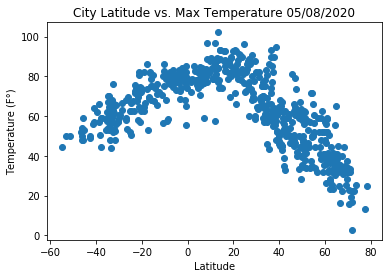

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in both directions the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


In [39]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Max Temp"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F°)")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Max Temperature.png")
plt.show()

print("Observing the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in both directions the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")

## Latitude vs. Humidity Plot

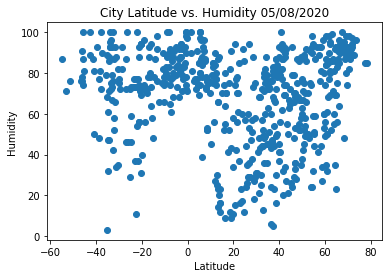

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid


In [40]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Humidity"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Humidity.png")
plt.show()

print("Being the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid")

## Latitude vs. Cloudiness Plot

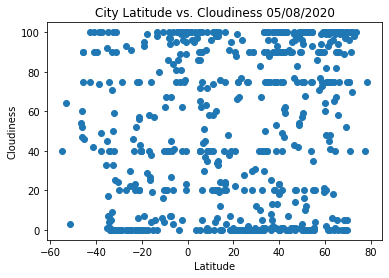

The data for clouds appears to be very irregular, 
 and I'm curious how they sampled the percentages, 
 other than no clouds and full coverage


In [41]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Cloudiness"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Cloudinessy.png")
plt.show()

print("The data for clouds appears to be very irregular, \n and I'm curious how they sampled the percentages, \n other than no clouds and full coverage")

## Latitude vs. Wind Speed Plot

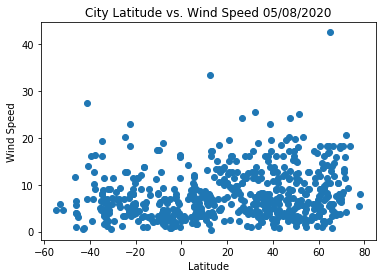

Wind speed at surface appear to have a uniform 
 disperal, with a few outliers of faster currents in the 
 higher +/- latitudes this is caused by the 


In [42]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Wind Speed"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the chart
plt.savefig("images/City Latitude vs. Wind Speed.png")
plt.show()

print("Wind speed at surface appear to have a uniform \n disperal, with a few outliers of faster currents in the \n higher +/- latitudes this is caused by the ")

## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots
# Function takes 6 argument, x_axis & y_axis handles the data being plotted,
# x_title & y_title are the axis titles applied to appropriate axis data,
# and x_cord & y_cord gives location to start the annotation.

def regressionPlot(x_axis, y_axis, x_title, y_title, x_cord, y_cord):
    
    # calculates the values needed for plotting the linear regression and displaying the r-square value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # creates the linear regression
    regress_values = x_axis * slope + intercept
    
    # equation for being displayed on plot
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Scatter plot block of code for plotting data and titling
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(x_cord,y_cord), fontsize=18, color="red")
    plt.xlabel(x_title, fontsize=16)
    plt.ylabel(y_title, fontsize=16)
    plt.title(f'{x_title} vs. {y_title} {time.strftime("%m/%d/%Y")}', fontsize=16)
    print(f"The R-Squared is: {rvalue**2}")
    return



In [44]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere
northHemi_df = relevant_df[relevant_df['Lat'] >= 0]

# Southern Hemisphere
southHemi_df = relevant_df[relevant_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: 0.7331220343774973

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in the positive direction the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


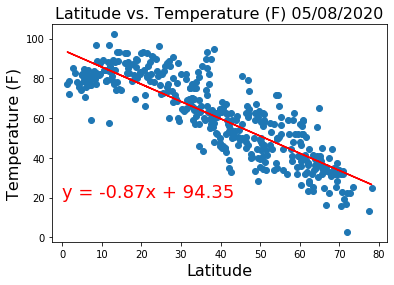

In [45]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Max Temp'],'Latitude','Temperature (F)', 0, 20)
print("\nObserving the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in the positive direction the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")
plt.savefig("images/northTempLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: 0.6062610759144013

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in the negative direction the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


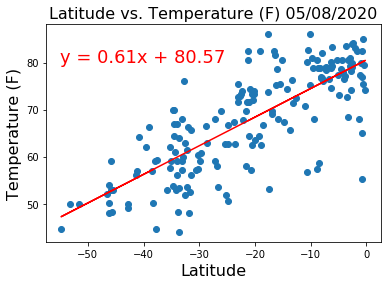

In [46]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Max Temp'],'Latitude','Temperature (F)',-55, 80)
print("\nObserving the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in the negative direction the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")
plt.savefig("images/southTempLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.033723392309756586

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid at the equator.


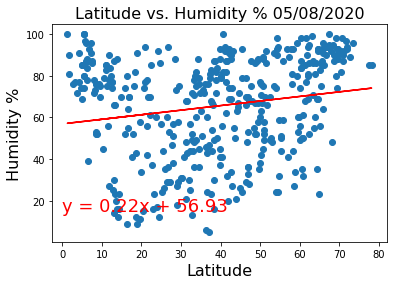

In [47]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Humidity'],'Latitude','Humidity %', 0, 15)
print("\nBeing the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid at the equator.")
plt.savefig("images/northHumLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.030068323504975823

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid at the equator.


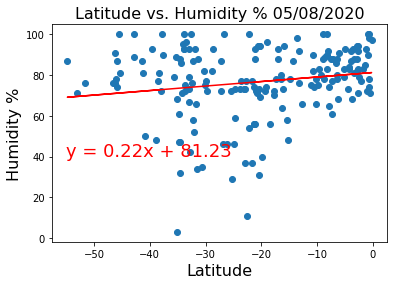

In [48]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Humidity'],'Latitude','Humidity %',-55, 40)
print("\nBeing the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid at the equator.")
plt.savefig("images/southHumLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.02570561396547453

No Measurable Correlation.


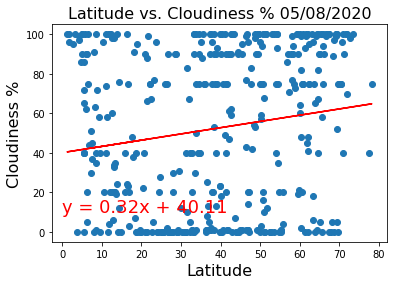

In [49]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Cloudiness'],'Latitude','Cloudiness %', 0, 10)
print("\nNo Measurable Correlation.")
plt.savefig("images/northCloudLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.035230414164391155

No Measurable Correlation.


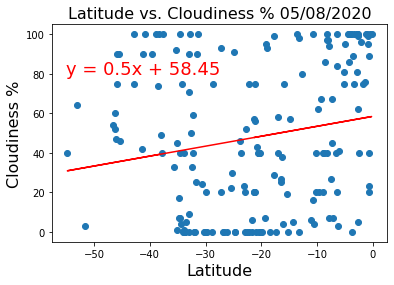

In [50]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Cloudiness'],'Latitude','Cloudiness %',-55, 80)
print("\nNo Measurable Correlation.")
plt.savefig("images/southCloudLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: 0.014330976232712182

No Measurable Correlation.


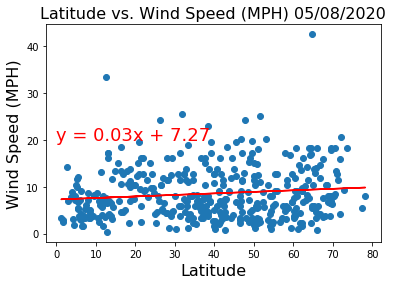

In [51]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)', 0, 20)
print("\nNo Measurable Correlation.")
plt.savefig("images/northWindLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: 0.013363600410820194

No Measurable Correlation.


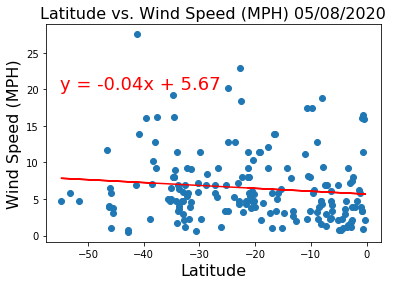

In [52]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)',-55, 20)
print("\nNo Measurable Correlation.")
plt.savefig("images/southWindLat.png")